In [ ]:
# two type of word2vec
# skip-gram
# continuous Bag of Words (CBOW)
# which words come frequently?

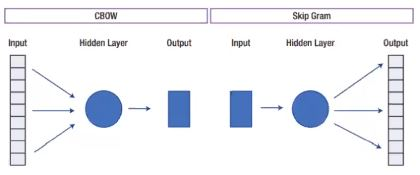

In [1]:
# install gensim
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#Example sentences
sentences = [['I', 'love', 'nlp'],
['I', 'will', 'learn', 'nlp', 'in', '2','months'],
['nlp', 'is', 'future'],
['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
['nlp', 'uses', 'machine', 'learning']]

In [4]:
#import libraries
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
import numpy as np

In [5]:
# Training the model
# sg - skipgram - 0:CBOW, 1 : skipram
# window: Max distance between current and predicted word within a sentence
skipgram = Word2Vec(sentences, vector_size = 50, window=3, min_count=1, sg=1)
print(skipgram)

Word2Vec(vocab=21, vector_size=50, alpha=0.025)


In [6]:
Word2Vec?

In [11]:
# access vector for one word
# print(len(skipgram.wv['nlp']))
print(skipgram.wv['nlp'])  # word vector of nlp

[-1.0724545e-03  4.7286271e-04  1.0206699e-02  1.8018546e-02
 -1.8605899e-02 -1.4233618e-02  1.2917745e-02  1.7945977e-02
 -1.0030856e-02 -7.5267432e-03  1.4761009e-02 -3.0669428e-03
 -9.0732267e-03  1.3108104e-02 -9.7203208e-03 -3.6320353e-03
  5.7531595e-03  1.9837476e-03 -1.6570430e-02 -1.8897636e-02
  1.4623532e-02  1.0140524e-02  1.3515387e-02  1.5257311e-03
  1.2701781e-02 -6.8107317e-03 -1.8928028e-03  1.1537147e-02
 -1.5043275e-02 -7.8722071e-03 -1.5023164e-02 -1.8600845e-03
  1.9076237e-02 -1.4638334e-02 -4.6675373e-03 -3.8754821e-03
  1.6154874e-02 -1.1861792e-02  9.0324880e-05 -9.5074680e-03
 -1.9207101e-02  1.0014586e-02 -1.7519170e-02 -8.7836506e-03
 -7.0199967e-05 -5.9236289e-04 -1.5322480e-02  1.9229487e-02
  9.9641159e-03  1.8466286e-02]


In [8]:
# since our vector size was 50, the model gives a vector of 50 for wach word

In [9]:
# access vector for another word
print(skipgram.wv['deep'])

KeyError: "Key 'deep' not present"

In [12]:
# Finding Similar words
sim_words = skipgram.wv.most_similar('love')
sim_words

[('time', 0.1898709386587143),
 ('2', 0.0449172779917717),
 ('months', -0.010146019048988819),
 ('nlp', -0.014475265517830849),
 ('learning', -0.023209011182188988),
 ('saves', -0.03210272267460823),
 ('in', -0.044072262942790985),
 ('industry', -0.044128309935331345),
 ('problems', -0.08984724432229996),
 ('machine', -0.09488877654075623)]

In [13]:
# save model
skipgram.save('skipgram.bin')

In [14]:
# load model
skipgram = Word2Vec.load('skipgram.bin')

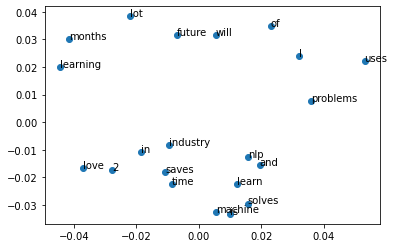

In [15]:
# A t-SNE plot is one of the ways to evaluate word embeddings. Let's generate it and see how it looks
# T - SNE plot - Stochastin Neighbor Embedding

X = np.asarray(skipgram.wv.vectors)
pca = PCA(n_components=2)  # nb of components/words = 2

result = pca.fit_transform(X)

# Create scatter plot of the projection
pyplot.scatter(result[:,0], result[:,1])

words = list(skipgram.wv.key_to_index.keys())

for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i,0], result[i,1]))

pyplot.show()

# Continuous Bag of Words (CBOW)

In [16]:
#import libraries
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [17]:
#Example sentences
sentences = [['I', 'love', 'nlp'],
['I', 'will', 'learn', 'nlp', 'in', '2','months'],
['nlp', 'is', 'future'],
['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
['nlp', 'uses', 'machine', 'learning']]

In [18]:
cbow = Word2Vec(sentences, vector_size=50, window=3, min_count=1, sg=0)
print(cbow)

Word2Vec(vocab=21, vector_size=50, alpha=0.025)


In [19]:
Word2Vec?

In [20]:
# access vector for one word
print(cbow.wv['nlp'])

[-1.0724545e-03  4.7286271e-04  1.0206699e-02  1.8018546e-02
 -1.8605899e-02 -1.4233618e-02  1.2917745e-02  1.7945977e-02
 -1.0030856e-02 -7.5267432e-03  1.4761009e-02 -3.0669428e-03
 -9.0732267e-03  1.3108104e-02 -9.7203208e-03 -3.6320353e-03
  5.7531595e-03  1.9837476e-03 -1.6570430e-02 -1.8897636e-02
  1.4623532e-02  1.0140524e-02  1.3515387e-02  1.5257311e-03
  1.2701781e-02 -6.8107317e-03 -1.8928028e-03  1.1537147e-02
 -1.5043275e-02 -7.8722071e-03 -1.5023164e-02 -1.8600845e-03
  1.9076237e-02 -1.4638334e-02 -4.6675373e-03 -3.8754821e-03
  1.6154874e-02 -1.1861792e-02  9.0324880e-05 -9.5074680e-03
 -1.9207101e-02  1.0014586e-02 -1.7519170e-02 -8.7836506e-03
 -7.0199967e-05 -5.9236289e-04 -1.5322480e-02  1.9229487e-02
  9.9641159e-03  1.8466286e-02]


In [21]:
# Input - context words Output - Predicts the current word

In [23]:
# save model
cbow.save('cbow.bin')

#load
cbow = Word2Vec.load('cbow.bin')

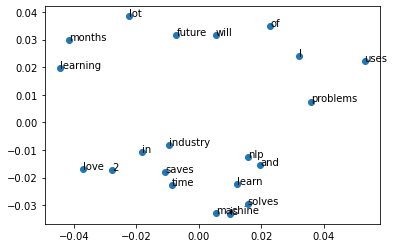

In [25]:
# T - SNE Plot
X = np.asarray(cbow.wv.vectors)
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(cbow.wv.key_to_index.keys())
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


In [26]:
# Training these models requires a huge amount of computing power. Let’s use Google’s pre-trained
# model, which has been trained with more than 100 billion words. Import the gensim package and
# follow the steps to learn Google’s word2vec.
#Link for download: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

In [27]:
import gensim
# load the saved model
model = gensim.models.keyedvectors.KeyedVectors.load_word2vec_format('./models/GoogleNews-vectors-negative300.bin', binary=True)
#Checking how similarity works.
print (model.similarity('this', 'is'))

0.40797037


In [28]:
# Let's check one more
print(model.similarity('post','book'))

0.057204384


In [29]:
# 'This' and 'is' have good amount of similarity, but the similarity between the words 'post' and 'book' is poort. 
# For any given set of words, it uses the vectors of both words and calculates the similarity between them


In [30]:
# finding the odd ones out
model.doesnt_match('breakfast cereal dinner lunch'.split())

'cereal'

In [31]:
# it is also finding the relations between words
model.most_similar(positive=['woman','king'], negative=['man'])
# if you add woman and king and subtract man, it predicts queen as the output with 71% condidence

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

# Implementing fastText (developed by Facebook)

In [32]:
# Import
from gensim.models import FastText
from sklearn.decomposition import PCA
from matplotlib import pyplot


In [33]:
#Example sentences
sentences = [['I', 'love', 'nlp'],
['I', 'will', 'learn', 'nlp', 'in', '2','months'],
['nlp', 'is', 'future'],
['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of',
'industry', 'problems'],
['nlp', 'uses', 'machine', 'learning']]
fast = FastText(sentences,vector_size=20, window=1, min_count=1, workers=5,min_n=1, max_n=2)

In [34]:
FastText?

In [35]:
print(fast.wv['nlp'])

[-0.01044169 -0.00166992  0.00851491 -0.00545158 -0.01564237  0.01678065
  0.00298395  0.00162992 -0.01518791  0.00655623  0.01039656 -0.00142836
 -0.01665709  0.00949577  0.00262534 -0.00541661  0.0063507  -0.00105192
 -0.02014117  0.00102295]


In [36]:
print(fast.wv['deep'])

[-0.00718654 -0.00310375 -0.00214245 -0.00143114 -0.00600196  0.00922425
  0.01241926 -0.00713524 -0.00693269 -0.00987075  0.01335533 -0.00810269
  0.01761531 -0.00716007 -0.00427308  0.00729467  0.01494505 -0.01626069
  0.01229173  0.01455308]


In [37]:
import numpy as np

In [38]:
# This is the advantage of using fastText. The word deep was not present in training word2vec, and
# we did not get a vector for that word. But since fastText is building the character level, it provides
# results—even for a word that was not there in training. You can see the vector for the word deep.

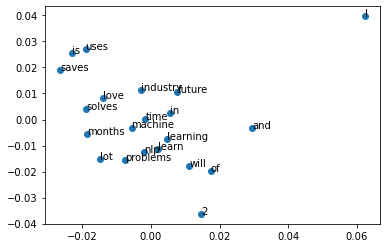

In [39]:
# visualize
X = np.asarray(fast.wv.vectors)
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(fast.wv.key_to_index.keys())
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()